![](https://um.edu.uy/sites/default/files/LogoUniversidadMontevideo.png)

# Curso de Aprendizaje Automático
## Análisis de Componentes Principales

In [1]:
import numpy as np
from numpy import linalg as LA

Defino la matriz $\begin{pmatrix} 7 & 3 \\ 3 & 5 \end{pmatrix}$

In [2]:
M = np.array([[7,3],[3,5]])
print (M)

[[7 3]
 [3 5]]


Ahora calculo los valores y vectores propios con numpy

- Se centran los datos
- Se genera la matriz de covarianza
- Se calculan valores y vectores propios

In [3]:
Mnorm = M-np.mean(M, axis=0)
cov = np.cov(Mnorm.T)
eig_val, eig_vec = np.linalg.eig(cov)

print (eig_val)
print (eig_vec.T)



[10.  0.]
[[ 0.89442719 -0.4472136 ]
 [ 0.4472136   0.89442719]]


##Ahora usamos sklearn para efectuar el PCA sobre la matriz M, con el objetivo de disminuir su dimensionalidad

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(M)
M_PCA = pca.transform(M)
print("Dimensiones de la matriz original: ", M.shape)
print("Dimensiones de la matriz transformada: ",M_PCA.shape)


Dimensiones de la matriz original:  (2, 2)
Dimensiones de la matriz transformada:  (2, 1)


Revisemos los componentes que calculó el PCA y los comparamos con los que obtuvimos nosotros

In [5]:
pca.n_components_
print(pca.components_)

[[-0.89442719  0.4472136 ]]


Revisamos la varianza de los componentes

In [6]:
print(pca.explained_variance_)

[10.]


##PCA para visualización: Hand-written digits
La utilidad de la reducción de dimensionalidad puede no ser del todo evidente en solo dos dimensiones, pero se vuelve mucho más clara cuando se observan datos de alta dimensión.

In [7]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Vemos los datos del primer dígito

In [8]:
print(digits.target[0])
print (digits.images[0])

0
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


Ahora lo graficamos

<Figure size 432x288 with 0 Axes>

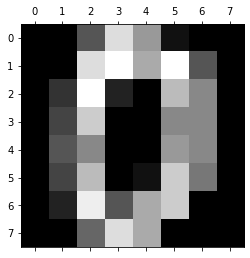

In [9]:
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

Los datos constan de imágenes de 8 × 8 píxeles, lo que significa que son de 64 dimensiones. Para obtener algo de intuición sobre las relaciones entre estos puntos, podemos usar PCA para proyectarlos a un número más manejable de dimensiones, digamos dos:

In [10]:
pca = PCA(2)  # proyectamos de 64 a 2 dimensiones
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


Ahora podemos graficar los dos primeros componentes principales de cada punto para visualizar los datos:

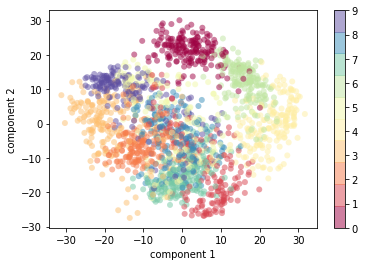

In [11]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Ahora proyectamos a 10 dimensiones y analizamos la varianza

In [16]:
pca = PCA(20)  # proyectamos de 64 a 20 dimensiones
projected = pca.fit_transform(digits.data)
print (pca.explained_variance_ratio_)


[0.14890594 0.13618771 0.11794594 0.08409979 0.05782415 0.0491691
 0.04315987 0.03661373 0.03353248 0.03078806 0.02372341 0.02272697
 0.01821863 0.01773855 0.01467101 0.01409716 0.01318589 0.01248138
 0.01017718 0.00905617 0.00889538 0.00797123 0.00767493 0.00722904
 0.00695889 0.00596081 0.00575615 0.00515158 0.0048954  0.00428888
 0.00373606 0.00353274 0.00336684 0.0032803  0.00308321 0.00293779
 0.00256589 0.00227742 0.00222278 0.0021143  0.00189909 0.00158653
 0.0015116  0.00140579 0.00116622 0.00107493 0.00096405 0.00077463
 0.00055721 0.00040433]


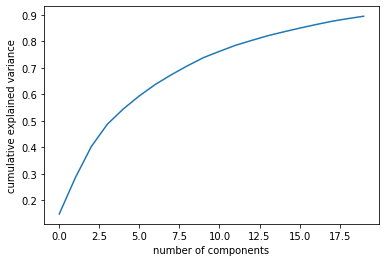

In [13]:
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Revisamos la sumatoria de las varianzas de las primeros 18 componentes principales

In [15]:
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:18]))
#Vemos que con 18 componentes tenemos algo mas del 85% de varianza explicada

[0.14890594 0.13618771 0.11794594 0.08409979 0.05782415 0.0491691
 0.04315987 0.03661373 0.03353248 0.03078806 0.0237234  0.02272696
 0.01821861 0.01773851 0.01467041 0.01409381 0.01318548 0.01248118
 0.01017362 0.00905503]
suma: 0.875065133718539
